In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df_diseased = pd.read_csv("CSV/PD.csv")
df_healthy = pd.read_csv("CSV/Healthy.csv")

# Add a label column: '1' for diseased, '0' for healthy
df_diseased['Label'] = 1
df_healthy['Label'] = 0

# Combine the datasets into one DataFrame
combined_df = pd.concat([df_diseased, df_healthy], ignore_index=True)

# Separate features and labels
X = combined_df.drop(columns=['Label'])  # Features
y = combined_df['Label']                # Labels

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [4]:
# Perform PCA without specifying the number of components
# to retain all components initially
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

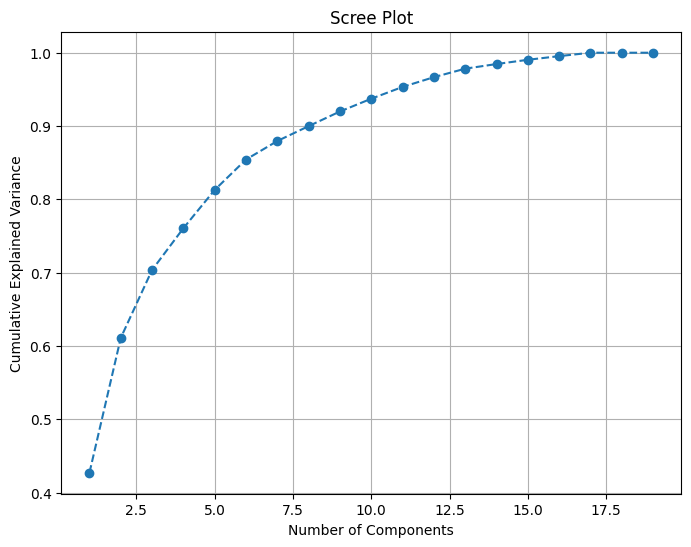

In [5]:
# Plot the Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
        cumulative_explained_variance,
        marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [6]:
# number of components that with at least 95% of the variance
threshold = 0.95
n_components = next(
    i for i, total_var in enumerate(cumulative_explained_variance) 
    if total_var >= threshold
) + 1

print(
    f"The optimal number of components"
    " to retain 95% variance is: {n_components}"
)

The optimal number of components to retain 95% variance is: 11
